Importing plotly failed. Interactive plots will not work.
23:08:47 - cmdstanpy - INFO - Chain [1] start processing
23:08:48 - cmdstanpy - INFO - Chain [1] done processing
/Users/rajkumarmyakala/prophet-failure-forecast/venv/lib/python3.13/site-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


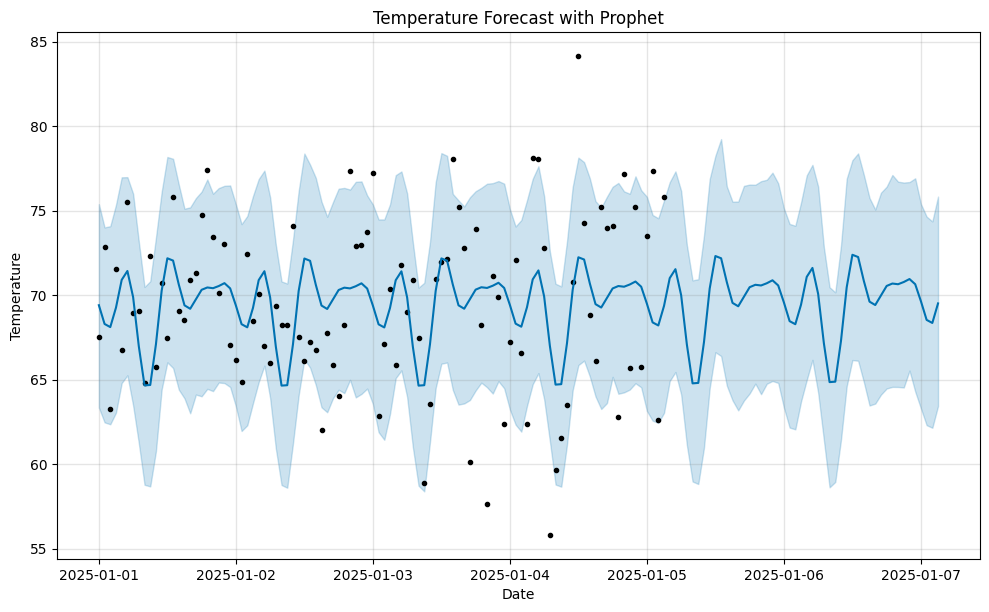

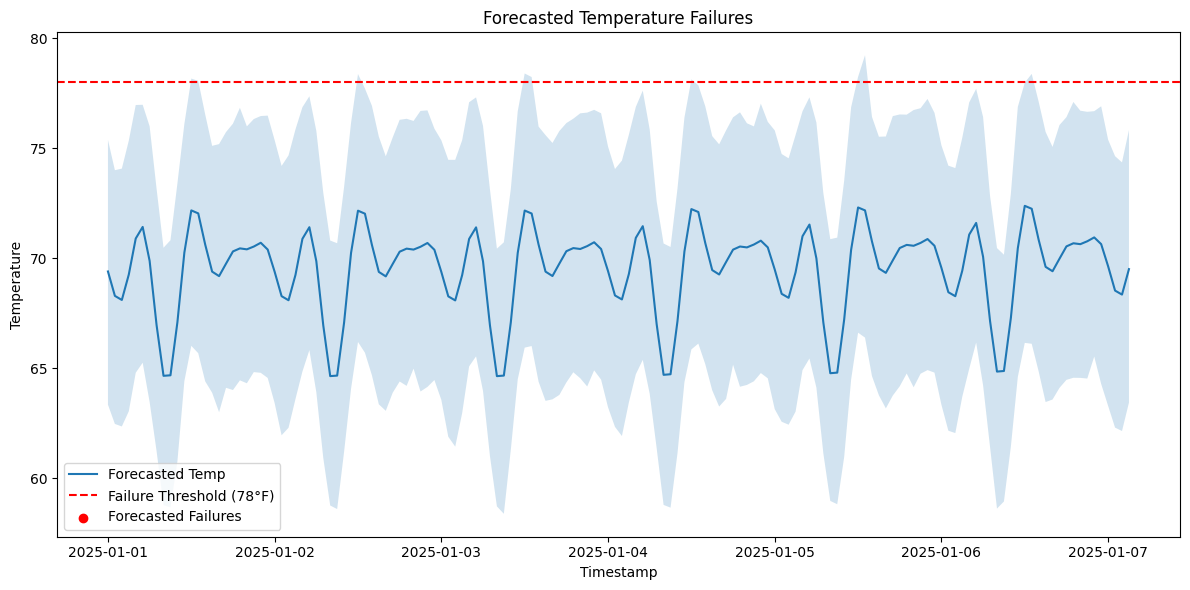

In [1]:
# 📦 Imports
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# 📂 Load data
df = pd.read_csv("../data/sensor_data.csv", parse_dates=["timestamp"])
df_prophet = df[["timestamp", "temperature"]].rename(columns={"timestamp": "ds", "temperature": "y"})

# 🔮 Build and fit Prophet model
model = Prophet()
model.fit(df_prophet)

# 📅 Forecast next 48 hours
future = model.make_future_dataframe(periods=48, freq="H")
forecast = model.predict(future)

# 📊 Plot 1 – Forecast
model.plot(forecast)
plt.title("Temperature Forecast with Prophet")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.show()

# ⚠️ Add Failure Risk Column
forecast["failure_risk"] = forecast["yhat"] > 78

# 📊 Plot 2 – Highlight Forecasted Failures
plt.figure(figsize=(12, 6))
plt.plot(forecast["ds"], forecast["yhat"], label="Forecasted Temp")
plt.fill_between(forecast["ds"], forecast["yhat_upper"], forecast["yhat_lower"], alpha=0.2)
plt.axhline(78, color="red", linestyle="--", label="Failure Threshold (78°F)")
plt.scatter(
    forecast[forecast["failure_risk"]]["ds"],
    forecast[forecast["failure_risk"]]["yhat"],
    color="red", label="Forecasted Failures", zorder=5
)
plt.title("Forecasted Temperature Failures")
plt.xlabel("Timestamp")
plt.ylabel("Temperature")
plt.legend()
plt.tight_layout()
plt.show()
